In [34]:

import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


plt.style.use('ggplot')



# 1. Import file

In [3]:
df = pd.read_csv(r"C:\Users\User\Desktop\mini-project\public_150k_plus_230101.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968531 entries, 0 to 968530
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968531 non-null  int64  
 1   DateApproved                 968531 non-null  object 
 2   SBAOfficeCode                968531 non-null  int64  
 3   ProcessingMethod             968531 non-null  object 
 4   BorrowerName                 968527 non-null  object 
 5   BorrowerAddress              968517 non-null  object 
 6   BorrowerCity                 968519 non-null  object 
 7   BorrowerState                968518 non-null  object 
 8   BorrowerZip                  968518 non-null  object 
 9   LoanStatusDate               930864 non-null  object 
 10  LoanStatus                   968531 non-null  object 
 11  Term                         968531 non-null  int64  
 12  SBAGuarantyPercentage        968531 non-null  int64  
 13 

# 2. Wrangler,Cleansing Data

In [4]:
#find NaN in data
null_percentages = df.isna().sum() / len(df) * 100
null_columns = null_percentages[null_percentages > 80].index.tolist()

print(f"Column have NaN more than 80% = {null_columns}")

Column have NaN more than 80% = ['FranchiseName', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED', 'DEBT_INTEREST_PROCEED', 'NonProfit']


2.1 drop column have NaN more than 80% and column UTILITIES_PROCESS

In [5]:
# drop column have NaN more than 80%
df = df.drop(['FranchiseName', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED', 'DEBT_INTEREST_PROCEED', 'NonProfit','UTILITIES_PROCEED'],axis=1)

In [6]:
df.isnull().sum()

LoanNumber                         0
DateApproved                       0
SBAOfficeCode                      0
ProcessingMethod                   0
BorrowerName                       4
BorrowerAddress                   14
BorrowerCity                      12
BorrowerState                     13
BorrowerZip                       13
LoanStatusDate                 37667
LoanStatus                         0
Term                               0
SBAGuarantyPercentage              0
InitialApprovalAmount              0
CurrentApprovalAmount              0
UndisbursedAmount                 47
ServicingLenderLocationID          0
ServicingLenderName                0
ServicingLenderAddress             0
ServicingLenderCity                0
ServicingLenderState               0
ServicingLenderZip                 0
RuralUrbanIndicator                0
HubzoneIndicator                   0
LMIIndicator                       0
BusinessAgeDescription             1
ProjectCity                       13
P

In [7]:
df = df.dropna()

In [8]:
df.isna().sum()

LoanNumber                     0
DateApproved                   0
SBAOfficeCode                  0
ProcessingMethod               0
BorrowerName                   0
BorrowerAddress                0
BorrowerCity                   0
BorrowerState                  0
BorrowerZip                    0
LoanStatusDate                 0
LoanStatus                     0
Term                           0
SBAGuarantyPercentage          0
InitialApprovalAmount          0
CurrentApprovalAmount          0
UndisbursedAmount              0
ServicingLenderLocationID      0
ServicingLenderName            0
ServicingLenderAddress         0
ServicingLenderCity            0
ServicingLenderState           0
ServicingLenderZip             0
RuralUrbanIndicator            0
HubzoneIndicator               0
LMIIndicator                   0
BusinessAgeDescription         0
ProjectCity                    0
ProjectCountyName              0
ProjectState                   0
ProjectZip                     0
CD        

In [9]:
pd.options.display.float_format = "{:,.2f}".format
df.describe()[['InitialApprovalAmount','CurrentApprovalAmount']]

,InitialApprovalAmount,CurrentApprovalAmount
count,"916,738.00","916,738.00"
mean,"530,606.79","528,933.92"
std,"734,838.50","728,620.50"
min,0.00,"150,000.00"
25%,"200,644.19","200,800.00"
50%,"296,041.00","295,843.18"
75%,"541,696.50","540,522.00"
max,"10,000,000.00","10,000,000.00"


<AxesSubplot: >

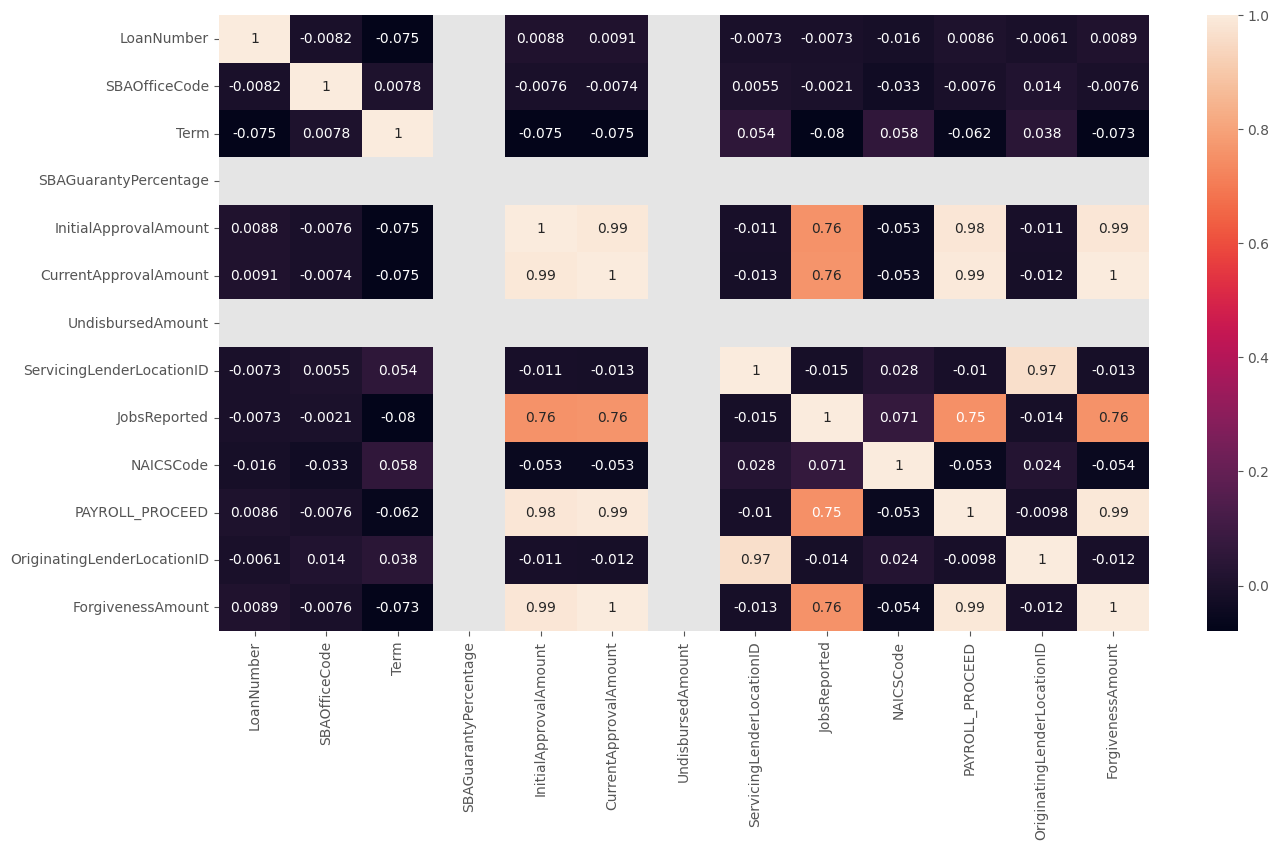

In [10]:
corr = df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True)

In [11]:
#change scientific notation to decimal 2 number
pd.options.display.float_format = "{:,.2f}".format
aggegate_ini = df['InitialApprovalAmount'].agg(['mean','count','max','min'])
aggegate_cur = df['CurrentApprovalAmount'].agg(['mean','count','max','min'])

print(aggegate_ini)

print("\n--------------------------------------------\n")

print(aggegate_cur)

mean       530,606.79
count      916,738.00
max     10,000,000.00
min              0.00
Name: InitialApprovalAmount, dtype: float64

--------------------------------------------

mean       528,933.92
count      916,738.00
max     10,000,000.00
min        150,000.00
Name: CurrentApprovalAmount, dtype: float64


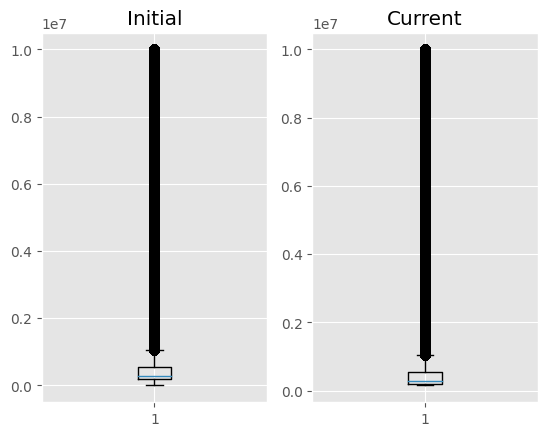

In [12]:
#boxplox looking for outliner
plt.subplot(1,2,1)
plt.boxplot(df['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.boxplot(df['CurrentApprovalAmount'])
plt.title('Current')
plt.show()

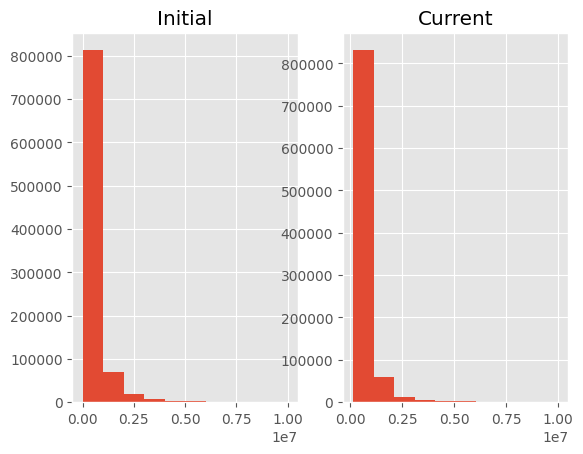

In [13]:
plt.subplot(1,2,1)
plt.hist(df['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.hist(df['CurrentApprovalAmount'])
plt.title('Current')

plt.show()

In [14]:
#remove outliner
def filter_outliner(df, column_name):
    q_low = df[column_name].quantile(0.025)
    q_hi  = df[column_name].quantile(0.975)
    df_filtered = df[(df[column_name] < q_hi) & (df[column_name] > q_low)]
    return df_filtered

df = filter_outliner(df,'InitialApprovalAmount')
df = filter_outliner(df,'CurrentApprovalAmount')

In [15]:
df.describe()[['InitialApprovalAmount','CurrentApprovalAmount']]

,InitialApprovalAmount,CurrentApprovalAmount
count,"827,249.00","827,249.00"
mean,"418,010.83","416,852.58"
std,"312,184.10","310,325.33"
min,"152,615.00","156,900.95"
25%,"207,400.00","207,100.00"
50%,"296,042.50","295,500.00"
75%,"501,005.47","500,000.00"
max,"2,275,100.00","1,719,928.20"


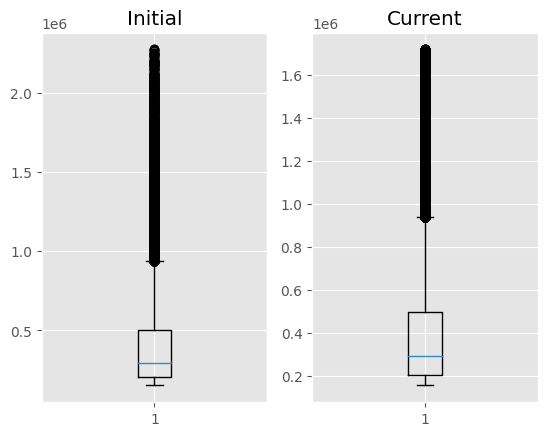

In [16]:
#boxplox looking for remove outliner
plt.subplot(1,2,1)
plt.boxplot(df['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.boxplot(df['CurrentApprovalAmount'])
plt.title('Current')
plt.show()

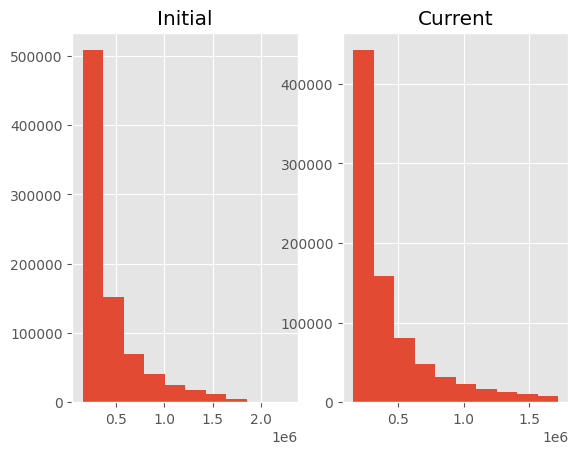

In [17]:
plt.subplot(1,2,1)
plt.hist(df['InitialApprovalAmount'])
plt.title('Initial')

plt.subplot(1,2,2)
plt.hist(df['CurrentApprovalAmount'])
plt.title('Current')

plt.show()

## Top 10 ของรัฐที่กู้เงินมากที่สุด


Text(0.5, 1.0, 'Top 10 State for PPP and PPE')

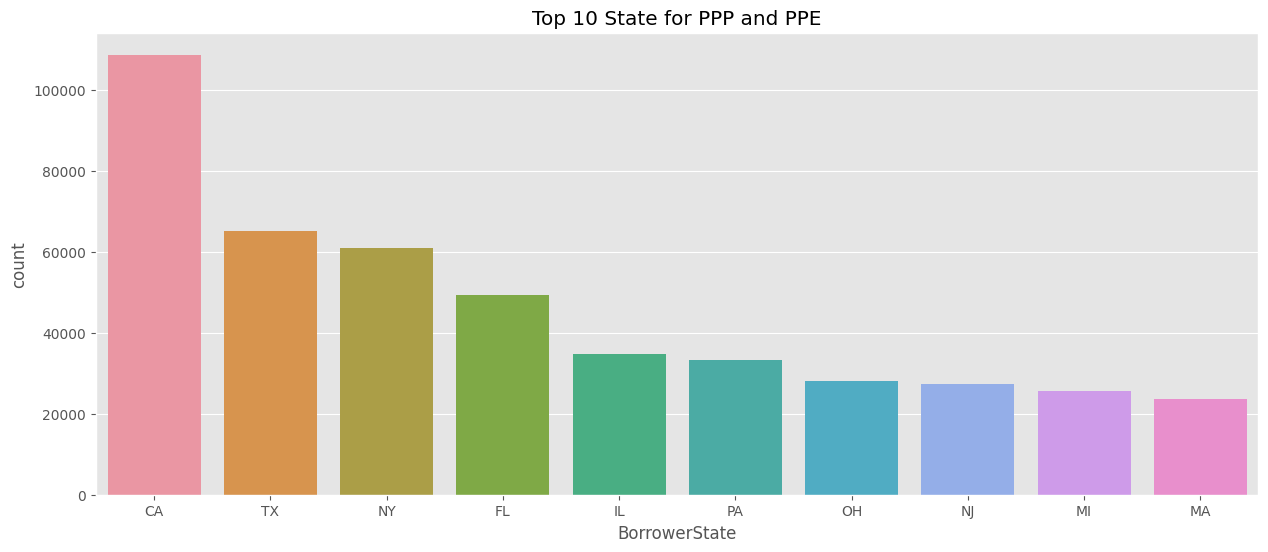

In [23]:
plt.figure(figsize = (15,6))
ax=sns.countplot(x="BorrowerState", data=df ,order = df['BorrowerState'].value_counts().index[:10], )
plt.title("Top 10 State for PPP and PPE")


สรุปได้ว่าที่เมือง CA = California มีจำนวนบริษัท ที่ใช้ บริการ PPE มากที่สุด

In [19]:
# ใน column มี ชื่อเหมือนกัน เช่น NEW YORK , NEW YORK
df['BorrowerCity'].str.upper()

137       KETCHIKAN
138       ANCHORAGE
139       ANCHORAGE
140       ANCHORAGE
141        SOLDOTNA
            ...    
968435     SHERIDAN
968436      FREEDOM
968437     SHERIDAN
968438     RIVERTON
968439         CODY
Name: BorrowerCity, Length: 827249, dtype: object

In [20]:
# change datatype of date to datetime 
df['DateApproved'] = pd.to_datetime(df['DateApproved'])

# check the format column
df.head(10)['DateApproved']

137   2020-04-27
138   2020-04-04
139   2021-01-30
140   2020-04-15
141   2021-02-14
142   2021-01-27
143   2020-04-13
144   2020-04-15
145   2020-04-16
146   2020-04-07
Name: DateApproved, dtype: datetime64[ns]

# Q1 : ค่าเฉลี่ยของเงินที่ยืมไปในแต่ละพื้นที่ว่าในแต่ละรัฐ รัฐไหนยืมมากที่สุดเรียงตามลำดับ

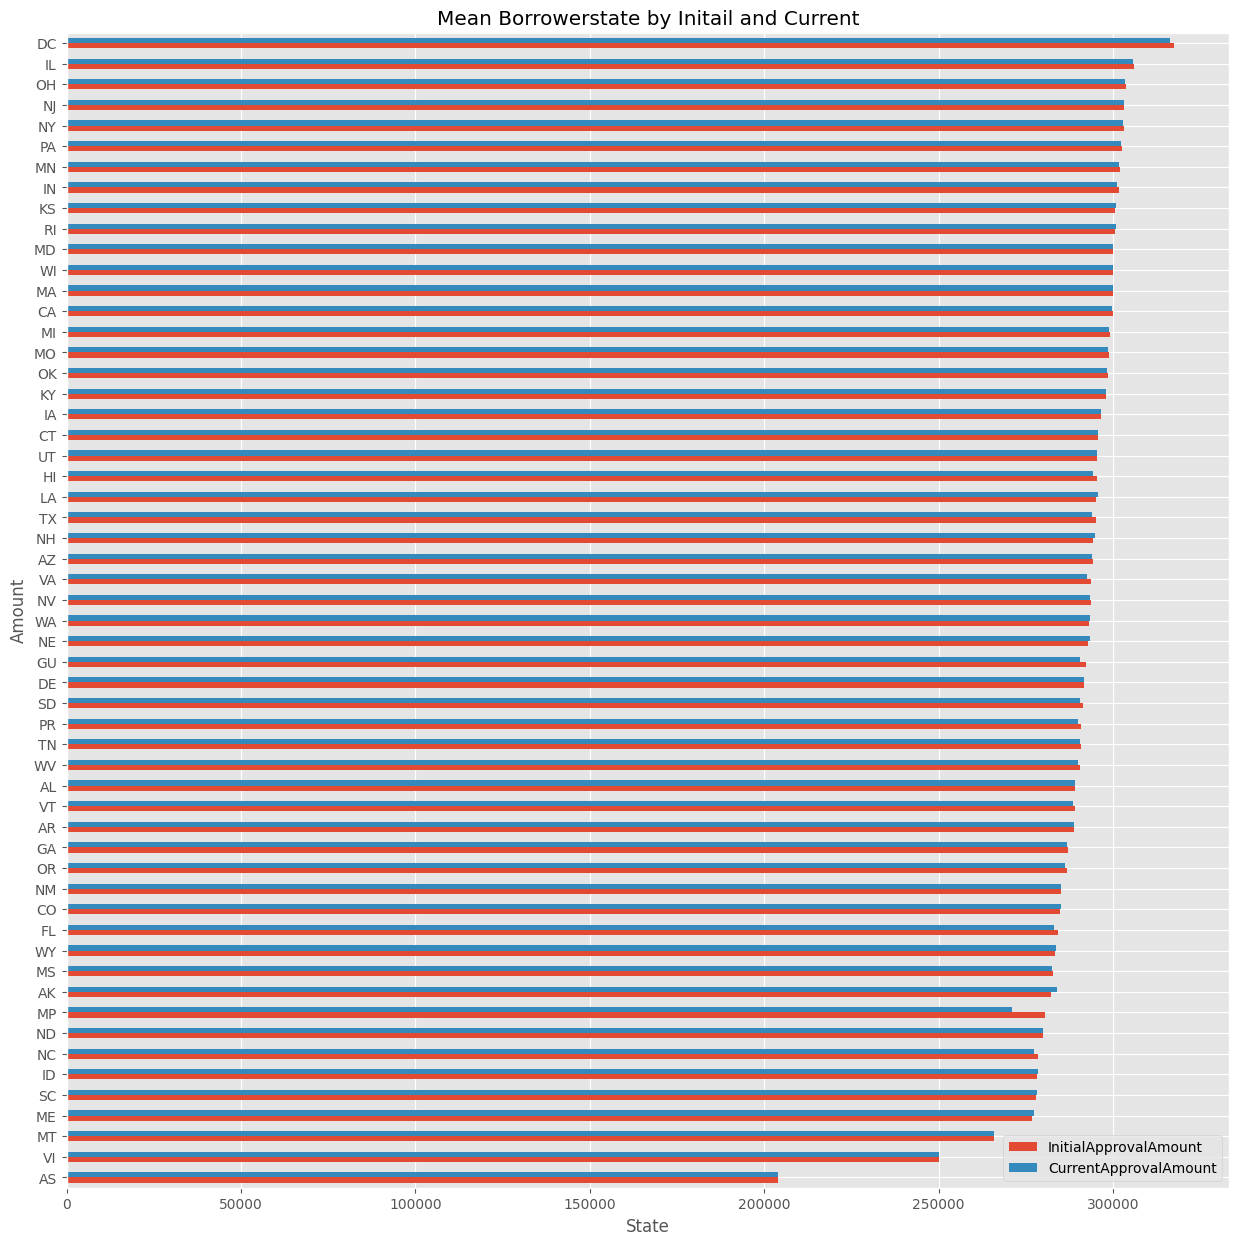

In [28]:
q1 = df.groupby("BorrowerState")['InitialApprovalAmount','CurrentApprovalAmount'].apply(lambda x : x.median()).sort_values(by = ["InitialApprovalAmount",'CurrentApprovalAmount'],ascending=True).plot(kind = 'barh' , figsize = (15,15)    )

plt.title('Mean Borrowerstate by Initail and Current')
plt.xlabel('State')
plt.ylabel('Amount')
plt.show()
    

<AxesSubplot: xlabel='count', ylabel='OriginatingLender'>

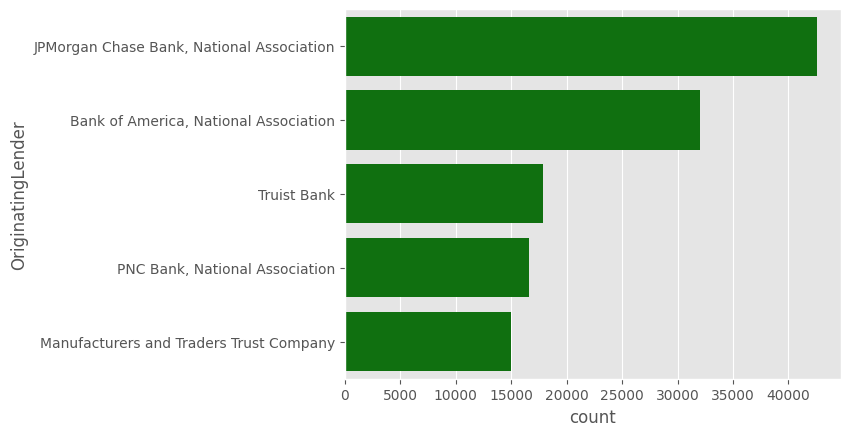

In [31]:
# Top 5 ธนาคารอะไรที่ให้กู้ยืมมากที่สุด
sns.countplot(data = df, y = 'OriginatingLender', order = df['OriginatingLender'].value_counts().index[:5], color = 'Green')

<AxesSubplot: xlabel='count', ylabel='BusinessType'>

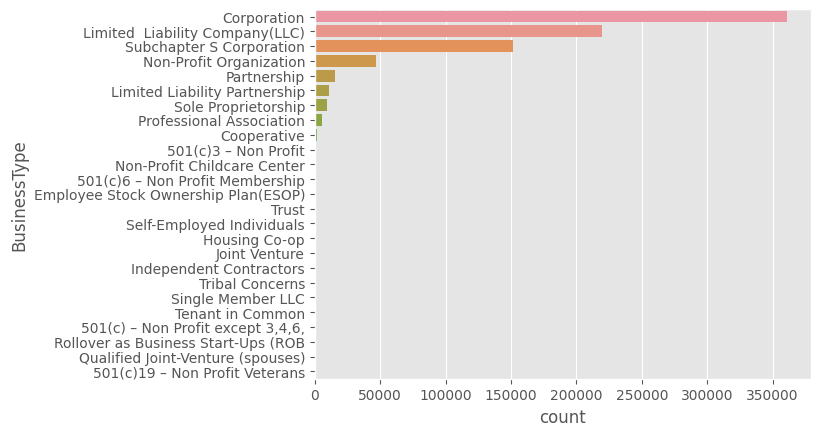

In [33]:
sns.countplot(data = df, y = 'BusinessType', order = df['BusinessType'].value_counts().index)

# Q2

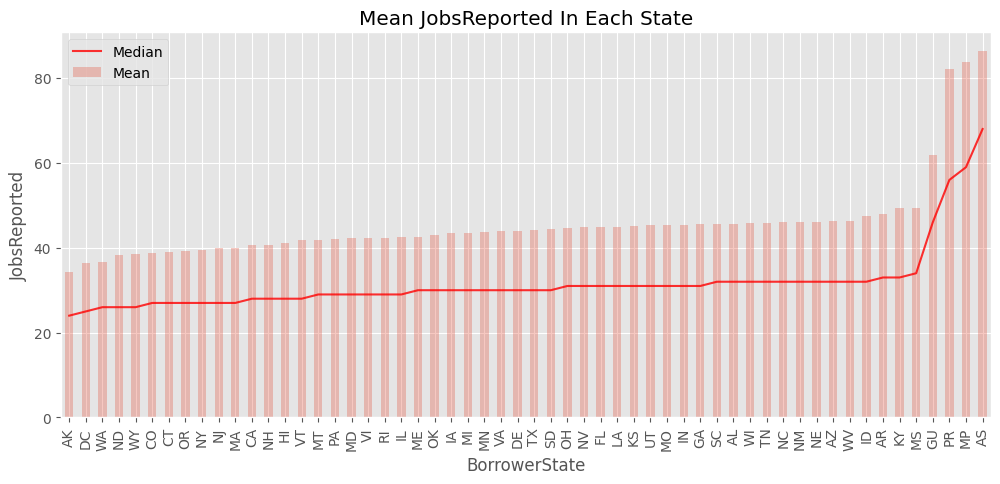

In [29]:
df.groupby("BorrowerState")['JobsReported'].mean().sort_values().plot(
    kind="bar",
    title = "Mean JobsReported  In Each State",
    alpha = 0.3,
    legend=True,
)

df.groupby("BorrowerState")["JobsReported"].median().sort_values().plot(
    kind="line",
    title = "Mean JobsReported In Each State",
    legend=True,
    color="red",
    rot=90,
    alpha=.8,
    figsize=(12,5) # Determines the size 
)
plt.ylabel("JobsReported") 
plt.legend(["Median", "Mean"]);

จาก กราฟ สรุปได้ว่า